In [ ]:
# tablet prediction#

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import os
import shutil
import glob
TRAIN_DIR = " /content/drive/MyDrive/tablet "
ORG_DIR = " /content/drive/MyDrive/tablet/train"
CLASS = ['contamination','crack','good']

for c in CLASS :
  DEST =os.path.join(TRAIN_DIR,c)
  #if directory is not present then create one 
if not os.path.exists(DEST):
    os.makedirs(DEST)


for img_path in glob.glob(os.path.join(ORG_DIR,c)+"*"):
      SRC=img_path
      shutil.copy(SRC,DEST)


In [ ]:
os.listdir("/content/drive/MyDrive/tablet/train")

['crack', 'good', 'contaminated']

In [ ]:
#building the model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import keras




In [ ]:
base_model=InceptionV3(input_shape=(256,256,3),include_top=False)


In [ ]:
for layer in base_model.layers:
  layer.trainable=False
  

In [ ]:
X=Flatten()(base_model.output)
X=Dense(units=3,activation='softmax')(X)



In [ ]:
#final model
model=Model(base_model.input,X)

In [ ]:
#compiling the model
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])


In [ ]:
#summary
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 127, 127, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 127, 127, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [ ]:

#preprocess
train_datagen=ImageDataGenerator(featurewise_center=True,
                                 rotation_range=0.4,
                                 width_shift_range=0.3,
                                 horizontal_flip=True,
                                 preprocessing_function=preprocess_input,
                                 zoom_range=0.4,
                                 shear_range=0.4)
train_data = train_datagen.flow_from_directory(directory="/content/drive/MyDrive/tablet/train",target_size=(256,256),batch_size=36)


Found 600 images belonging to 3 classes.


In [ ]:
train_data.class_indices

{'contaminated': 0, 'crack': 1, 'good': 2}

In [ ]:
#model checkpoints
from keras.callbacks import ModelCheckpoint,EarlyStopping
mc= ModelCheckpoint(filepath="./best_model.h5",
                              monitor="accuracy",
                              verbose=1,
                              save_best_only=True )
es=EarlyStopping (monitor="accuracy",min_delta=0.01,patience=5,verbose=1)
cb=[mc,es]

In [ ]:
#train
his = model.fit_generator(train_data,
                          steps_per_epoch=10,
                          epochs=30,
                          callbacks= cb )


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 4.9358 - accuracy: 0.4856
Epoch 1: accuracy improved from -inf to 0.48563, saving model to ./best_model.h5
10/10 [==============================] - 21s 1s/step - loss: 4.9358 - accuracy: 0.4856
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 1.0656 - accuracy: 0.6611
Epoch 2: accuracy improved from 0.48563 to 0.66111, saving model to ./best_model.h5
10/10 [==============================] - 11s 1s/step - loss: 1.0656 - accuracy: 0.6611
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.5514 - accuracy: 0.7833
Epoch 3: accuracy improved from 0.66111 to 0.78333, saving model to ./best_model.h5
10/10 [==============================] - 12s 1s/step - loss: 0.5514 - accuracy: 0.7833
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.4513 - accuracy: 0.8167
Epoch 4: accuracy improved from 0.78333 to 0.81667, saving model to ./best_model.h5
10/10 [=======================

In [ ]:
#graph
from keras.models import load_model
model=load_model("/content/best_model.h5")
h=his.history
h.keys()



dict_keys(['loss', 'accuracy'])

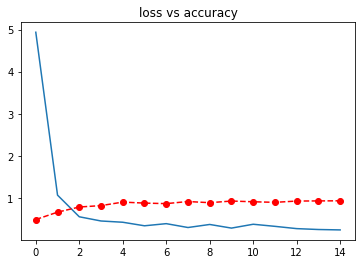

In [ ]:

plt.plot(h['loss'])
plt.plot(h['accuracy'],'go--',c="red")
plt.title("loss vs accuracy")
plt.show()

In [ ]:
#validate model
path="/content/drive/MyDrive/tablet/test/contaminated/pill_ginseng_contamination_305.png"
img=load_img(path,target_size=(256,256))
i=img_to_array(img)
i=preprocess_input(i)
input_arr=np.array([i])
input_arr.shape
pred=np.argmax(model.predict(input_arr))
if pred==0 :
  print("The tablet is contaminated")
elif pred==1 :
  print ("The tablet has a crack")
else :
  print("The tablet is good")

The tablet is contaminated


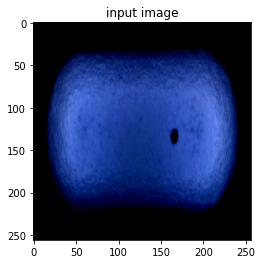

In [ ]:
#display
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()